In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_boston, load_breast_cancer, load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz 
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt 
import math

In [36]:
data = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/winequality-red.csv')
print(data.shape)
data.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [37]:
data.loc[data.quality.isin([3, 4, 5]),'quality']=0
data.loc[data.quality.isin([6, 7, 8]),'quality']=1

In [38]:
X = np.array(data.iloc[:, :-1])
y = np.array(data['quality'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print("X_train 크기: ", X_train.shape)
print("X_test 크기: ", X_test.shape)
print("y_train 크기: ", y_train.shape)
print("y_test 크기: ", y_test.shape)

X_train 크기:  (1199, 11)
X_test 크기:  (400, 11)
y_train 크기:  (1199,)
y_test 크기:  (400,)


# Randomforest와 비교를 위해 DecisionTree 모델 생성

In [40]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
temp_y_pred = tree.predict(X_test)

# RandomForest 모델 생성

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)

RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
temp_y_pred_rf = RF.predict(X_test)
temp_y_pred_rf

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [43]:
temp_acc = accuracy_score(y_test, temp_y_pred_rf)
print(format(temp_acc))

0.805


In [44]:
scores = []
for i in range(10, 500, 5): 
    RF = RandomForestClassifier(n_estimators=i, random_state=0)
    RF.fit(X_train, y_train)
    
    att = RF.predict(X_test)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    
    print('>%d, acc: %.3f' % (i, acc))

>10, acc: 0.780
>15, acc: 0.770
>20, acc: 0.802
>25, acc: 0.795
>30, acc: 0.797
>35, acc: 0.795
>40, acc: 0.797
>45, acc: 0.797
>50, acc: 0.807
>55, acc: 0.802
>60, acc: 0.802
>65, acc: 0.805
>70, acc: 0.810
>75, acc: 0.810
>80, acc: 0.807
>85, acc: 0.807
>90, acc: 0.807
>95, acc: 0.807
>100, acc: 0.805
>105, acc: 0.805
>110, acc: 0.802
>115, acc: 0.800
>120, acc: 0.800
>125, acc: 0.797
>130, acc: 0.802
>135, acc: 0.800
>140, acc: 0.797
>145, acc: 0.800
>150, acc: 0.795
>155, acc: 0.797
>160, acc: 0.792
>165, acc: 0.797
>170, acc: 0.797
>175, acc: 0.802
>180, acc: 0.797
>185, acc: 0.797
>190, acc: 0.797
>195, acc: 0.797
>200, acc: 0.797
>205, acc: 0.795
>210, acc: 0.797
>215, acc: 0.800
>220, acc: 0.802
>225, acc: 0.797
>230, acc: 0.800
>235, acc: 0.800
>240, acc: 0.795
>245, acc: 0.797
>250, acc: 0.797
>255, acc: 0.797
>260, acc: 0.802
>265, acc: 0.797
>270, acc: 0.797
>275, acc: 0.797
>280, acc: 0.800
>285, acc: 0.800
>290, acc: 0.800
>295, acc: 0.795
>300, acc: 0.795
>305, acc: 0.79

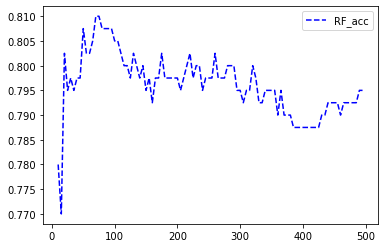

In [45]:
plt.plot(range(10, 500, 5), scores, 'b--', label='RF_acc')
plt.legend()

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [47]:
print('< DecisionTree >')
print('accuracy: ', accuracy_score(y_test, temp_y_pred))
print('precision: ', precision_score(y_test, temp_y_pred))
print('recall: ', recall_score(y_test, temp_y_pred))
print('f1: ', f1_score(y_test, temp_y_pred))

< DecisionTree >
accuracy:  0.7475
precision:  0.7345132743362832
recall:  0.8019323671497585
f1:  0.7667436489607391


In [48]:
print('< RandomForest >')
print('accuracy: ', accuracy_score(y_test, temp_y_pred_rf))
print('precision: ', precision_score(y_test, temp_y_pred_rf))
print('recall: ', recall_score(y_test, temp_y_pred_rf))
print('f1: ', f1_score(y_test, temp_y_pred_rf))

< RandomForest >
accuracy:  0.805
precision:  0.8115942028985508
recall:  0.8115942028985508
f1:  0.8115942028985508


### fpr1, tpr1, thresholds1 : DecisionTree 모델의 실제, 예측확률값을 활용한 값들. 
-  #### **fpr1 : FP(False Positive)의 비율 / tpr1(True Positive) : TP의 비율** 
### fpr2, tpr2, thresholds2 : RandomForest 모델의 실제, 예측확률값을 활용한 값들
- #### **fpr2 : FP(False Positive)의 비율 / tpr2 : TP(True Positive)의 비율**

In [49]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, tree.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RF.predict_proba(X_test)[:, 1])

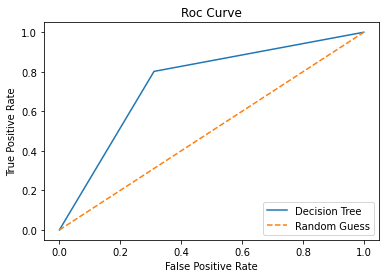

In [50]:
plt.plot(fpr1, tpr1, '-', ms=2, label='Decision Tree')
plt.plot([0, 1], [0,1], '--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.show()

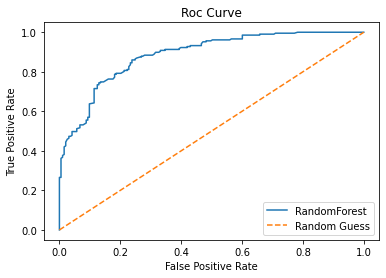

In [51]:
plt.plot(fpr2, tpr2, '-', ms=2, label='RandomForest')
plt.plot([0, 1], [0,1], '--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc Curve')
plt.legend(loc='lower right')
plt.show()

# AUC

In [52]:
from sklearn.metrics import auc

In [53]:
roc_auc_DT = auc(fpr1, tpr1)
roc_auc_RF = auc(fpr2, tpr2)

In [54]:
print('DT auc',roc_auc_DT)
print('RF auc',roc_auc_RF)

DT auc 0.7455257690671072
RF auc 0.8862856999824784


### DecisionTree가 Positive, Negative 클래스를 분류할 확률이 74%
### RandomForest가 Positive, Negative 클래스를 분류할 확률이 87&
## => RF가 DT보다 성능이 더 좋다.

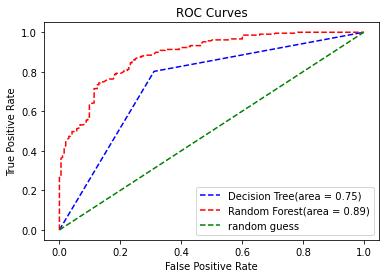

In [55]:
plt.plot(fpr1, tpr1, 'b--', label='Decision Tree(area = %.2f)'%roc_auc_DT)
plt.plot(fpr2, tpr2, 'r--', label='Random Forest(area = %.2f)'%roc_auc_RF)
plt.plot([0, 1], [0, 1], 'g--', label='random guess')

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

## 그래프로 한눈에 보아도, 거꾸로 ㄱ자에 더 가까운 그래프가 RandomForest이기 때문에 성능이 좋다고 볼 수 있다.

---

# 학생 합격분류 
## 전처리

In [56]:
dt = pd.read_csv('/Users/hayeon/Downloads/student (1).csv')

In [57]:
dt.drop(['nationality'], axis=1, inplace=True)
dt['sex']=dt['sex'].map({'f':0, 'm':1})
dt['admit']=dt['admit'].map({'불합격':0, '합격':1})
dt['gre']=dt['gre'].fillna(dt['gre'].mean())
dt['gpa']=dt['gpa'].fillna(dt['gpa'].mean())
dt.dropna(inplace=True)

## 데이터 분리

In [58]:
X = dt.iloc[:, :-1]
y = dt['admit']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## 모델링 DT

In [60]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_DT = tree.predict(X_test)

## 모델링 DT(max_depth=2)

In [61]:
tree_m = DecisionTreeClassifier(max_depth=2)
tree_m.fit(X_train, y_train)
y_pred_DT_m = tree_m.predict(X_test)

## 모델링 RF

In [62]:
RF = RandomForestClassifier(n_estimators=300, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [63]:
y_pred_RF = RF.predict(X_test)
y_pred_RF

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [64]:
temp_acc = accuracy_score(y_test, y_pred_RF)
print(format(temp_acc))

0.7


In [65]:
print('< DT >')
print('accuracy: ', accuracy_score(y_test, y_pred_DT))
print('precision: ', precision_score(y_test, y_pred_DT))
print('recall: ', recall_score(y_test, y_pred_DT))
print('f1: ', f1_score(y_test, y_pred_DT))

< DT >
accuracy:  0.71
precision:  0.5588235294117647
recall:  0.5757575757575758
f1:  0.5671641791044776


In [66]:
print('< max_depth=2 DT >')
print('accuracy: ', accuracy_score(y_test, y_pred_DT_m))
print('precision: ', precision_score(y_test, y_pred_DT_m))
print('recall: ', recall_score(y_test, y_pred_DT_m))
print('f1: ', f1_score(y_test, y_pred_DT_m))

< max_depth=2 DT >
accuracy:  0.7
precision:  0.6666666666666666
recall:  0.18181818181818182
f1:  0.28571428571428575


In [67]:
print('< RF >')
print('accuracy: ', accuracy_score(y_test, y_pred_RF))
print('precision: ', precision_score(y_test, y_pred_RF))
print('recall: ', recall_score(y_test, y_pred_RF))
print('f1: ', f1_score(y_test, y_pred_RF))

< RF >
accuracy:  0.7
precision:  0.5714285714285714
recall:  0.36363636363636365
f1:  0.4444444444444444
